In [2]:
#IMPORTS

import pandas as pd
import math
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys,os
%run ../datuslib.ipynb

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
N_df = pd.read_csv("../Data/train.csv")

In [6]:
N_df_desastres = N_df[N_df.target == 1]

In [7]:
N_keyword_desastre = N_df_desastres.keyword.dropna()
N_keyword_desastre

31                     ablaze
33                     ablaze
37                     ablaze
38                     ablaze
46                     ablaze
50                     ablaze
51                     ablaze
53                     ablaze
55                     ablaze
56                     ablaze
59                     ablaze
63                     ablaze
65                     ablaze
68                   accident
69                   accident
72                   accident
73                   accident
74                   accident
77                   accident
78                   accident
79                   accident
81                   accident
83                   accident
84                   accident
85                   accident
86                   accident
87                   accident
88                   accident
89                   accident
91                   accident
92                   accident
93                   accident
94                   accident
95        

In [8]:
def isKeywordInEnglish(keyword):
    keyword = str(keyword)
    englishDictionary = enchant.Dict("en_US")
    if englishDictionary.check(keyword):
        return True
    return False

N_keyword_desastre_ingles = N_keyword_desastre.map(isKeywordInEnglish)
N_keyword_desastre = N_keyword_desastre[N_keyword_desastre_ingles] #filtro las keywords que no estan en ingles

In [7]:
N_keyword_desastre.value_counts()

outbreak        39
derailment      39
wreckage        39
typhoon         37
debris          37
rescuers        32
evacuated       32
razed           31
earthquake      30
wildfire        29
collision       29
evacuation      28
drought         28
sandstorm       28
casualties      28
sinkhole        27
devastation     27
hostages        27
bombing         27
derailed        26
fatalities      26
floods          26
famine          26
thunderstorm    26
deaths          26
displaced       26
fatal           26
wounded         26
attack          25
flooding        25
massacre        25
evacuate        25
injured         24
hailstorm       24
accident        24
terrorism       24
rioting         23
terrorist       23
collided        23
arson           22
hazardous       22
refugees        22
tragedy         22
attacked        21
crashed         21
police          21
survivors       21
hurricane       20
catastrophic    20
explosion       20
ambulance       20
hijacker        19
engulfed    

## Frecuencia de las palabras clave de los tweets con desastre

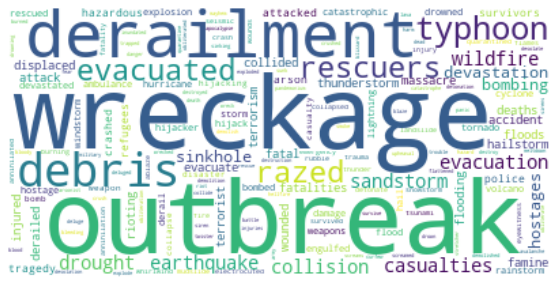

In [10]:
from stop_words import get_stop_words

freq = N_keyword_desastre.value_counts()

# Generate a word cloud image
wordcloud = WordCloud(background_color = 'white').generate_from_frequencies(freq)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[16,5])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
